In [58]:
import numpy as np
import matplotlib.pyplot as plt
from complex_iteration import mandelbrot_iteration
from scipy.integrate import solve_ivp
import matplotlib.gridspec as gridspec
import os
cs = ["#335c67","#fff3b0","#e09f3e","#9e2a2b","#540b0e"]


# Question 1

In [59]:
#Create a meshgrid to define c
x = np.linspace(-2, 2, 1000)
y = x
x, y = np.meshgrid(x, y)
i = 1j
c = x + y * i #define each c on cartesian plane

In [60]:
max_iter = 50 #maximum number of iterations
arb_limit = 1e5 #arbitrary limit for |z|

In [61]:
z, conv = mandelbrot_iteration(c, max_iter = max_iter, arb_limit = arb_limit)

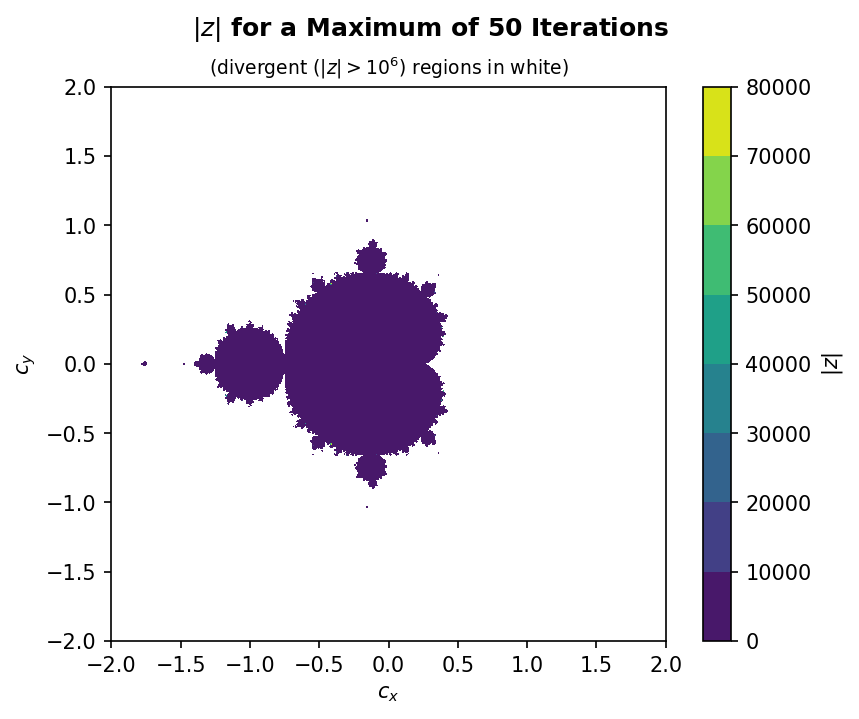

In [62]:
plt.figure(dpi = 150)
plt.contourf(x, y, abs(z))
plt.axis('scaled')
plt.colorbar(label = '$|z|$')

plt.xlabel('$c_x$')
plt.ylabel('$c_y$')
plt.suptitle(rf'$|z|$ for a Maximum of {max_iter} Iterations', fontweight = 'bold')
plt.title('(divergent ($|z|> 10^6$) regions in white)', fontsize = 9)
plt.show()


In [63]:
valid_mask = ~(np.isnan(z.real) | np.isnan(z.imag))
c_conv = c[valid_mask]

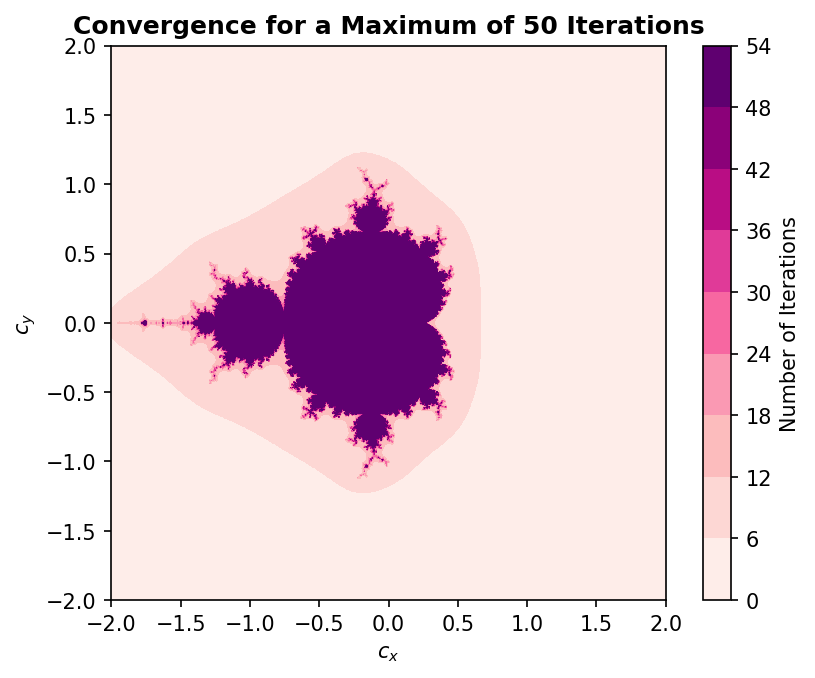

In [64]:
plt.figure(dpi = 150)
plt.contourf(x, y, conv, cmap = 'RdPu')
plt.axis('scaled')
cbar = plt.colorbar(label = 'Number of Iterations')

plt.title(rf'Convergence for a Maximum of {max_iter} Iterations', fontweight = 'bold')
plt.xlabel('$c_x$')
plt.ylabel('$c_y$')
os.makedirs('figures', exist_ok= True)

plt.savefig('figures/q1p1.png')
plt.show()

In [65]:
conv_div = np.zeros(c.shape, dtype = bool)
conv_div[valid_mask] = True

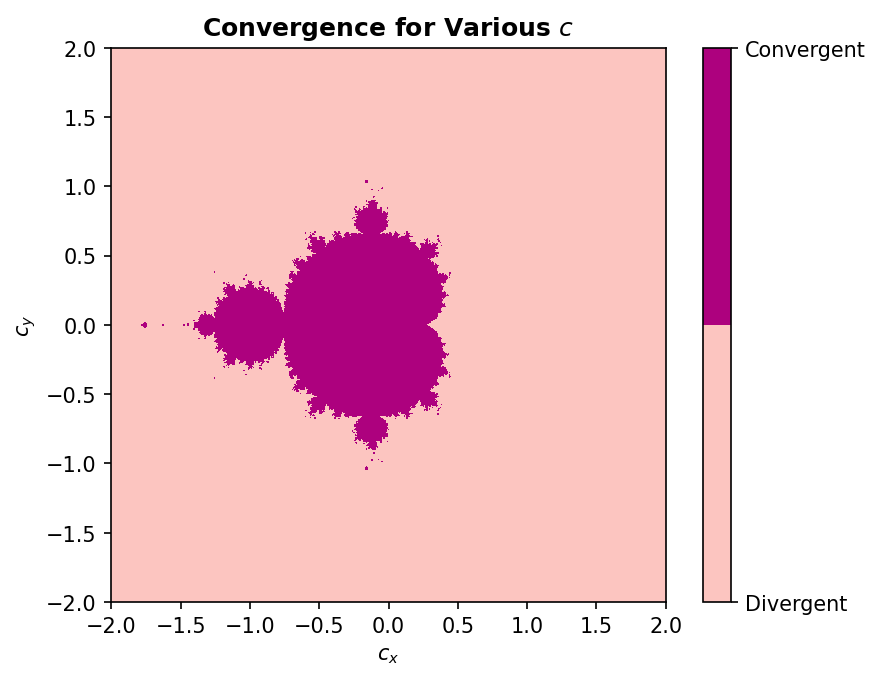

In [66]:
plt.figure(dpi = 150)
plt.contourf(x, y, conv_div, cmap = 'RdPu')
plt.axis('scaled')
cbar = plt.colorbar()
cbar.set_ticks([0, 1])
cbar.set_ticklabels(['Divergent', 'Convergent'])

plt.title(rf'Convergence for Various $c$', fontweight = 'bold')
plt.xlabel('$c_x$')
plt.ylabel('$c_y$')
plt.savefig('figures/q1p2.png')
plt.show()

# Question 2

## Part 1

In [67]:
def lorenz_system(t, w, sigma = 10., r = 28, b = 8./3.):
    """ 
    Lorenz system x-derivative function.
    Parameters
    ----------
    t : float
        time.
    w : array_like
        state vector (x, y, z).
    sigma : float, optional
        Prandtl number. The default is 10.
    r : float, optional
        Rayleigh number. The default is 28.
    b : float, optional
        length scale. The default is 8/3.
    Returns
    -------
    3-tuple
        (x, y, z) time derivative of the Lorenz system at (x, y, z).
    """
    x, y, z = w
    #the system is defined as:
    xdot = -sigma * (x - y)
    ydot = (r * x) - y - (x * z)
    zdot = x * y - b * z

    return (xdot, ydot, zdot)

## Part 2

In [68]:
dt = 0.01 #time step
t_range = 60
t_eval = np.arange(0, t_range, dt)
y0 = (0., 1., 0.) #initial conditions
solution = solve_ivp(lorenz_system, (0, t_range), y0, t_eval = t_eval) #solve the system
X, Y, Z = solution.y #unpack the solution
t = solution.t #unpack the time points

## Part 3

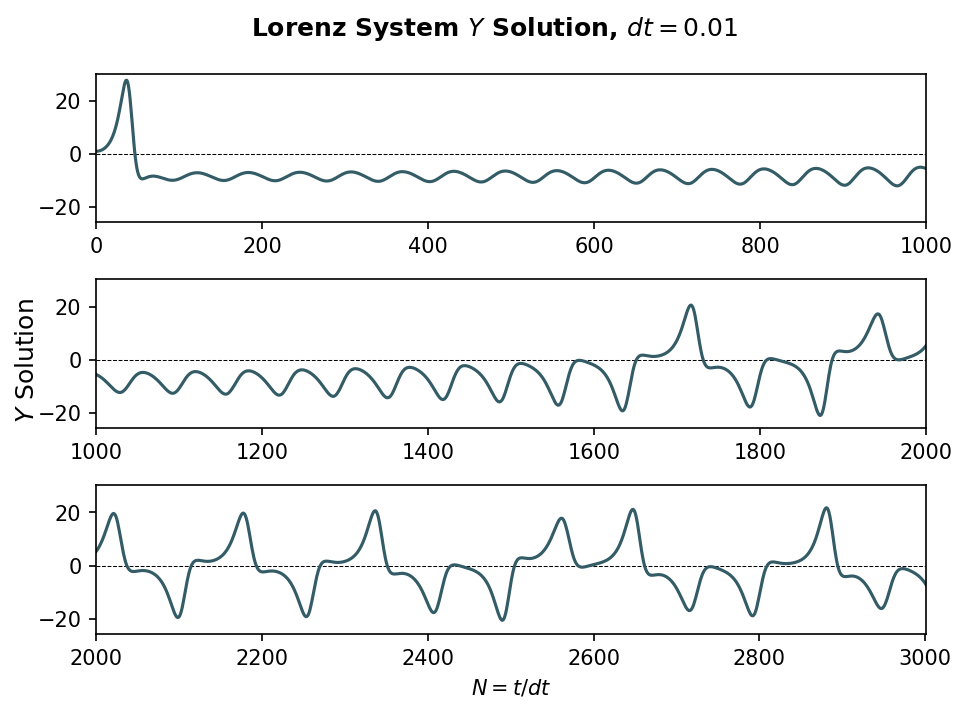

In [77]:
fig = plt.figure(dpi = 150)
gs = gridspec.GridSpec(3, 1, height_ratios = [1, 1, 1]) #create a grid for the subplots

ax1 = fig.add_subplot(gs[0, 0])  # First row
ax2 = fig.add_subplot(gs[1, 0])  # Second row
ax3 = fig.add_subplot(gs[2, 0])  # Third row

#first 1000 iterations
ax1.plot(t / dt, Y, c = cs[0], zorder = 1)
ax1.set_xlim(0, t_range / dt // 6)
ax1.axhline(0, color = 'black', lw = 0.5, ls = '--', zorder = 0)

#second 1000 iterations
ax2.plot(t / dt, Y, c = cs[0], zorder = 1)
ax2.set_xlim(t_range / dt // 6, 2 * t_range / dt // 6)
ax2.axhline(0, color = 'black', lw = 0.5, ls = '--', zorder = 0)

#third 1000 iterations
ax3.plot(t / dt, Y, c = cs[0], zorder = 1)
ax3.set_xlim(2 * t_range / dt // 6, (t_range / dt // 2) + 1)
ax3.axhline(0, color = 'black', lw = 0.5, ls = '--', zorder = 0)

plt.suptitle('Lorenz System $Y$ Solution, $dt = 0.01$', fontweight = 'bold')
fig.text(0.00, 0.5, '$Y$ Solution', va='center', rotation='vertical', fontsize=12)
plt.xlabel('$N = t / dt$')
plt.tight_layout()

plt.savefig('figures/q3p3.png')

## Part 4

In [70]:
#Obtain hi-res solution between t = 1400 and 19000
t1419 = np.linspace(14, 19, 5000)
solution1419 = solve_ivp(lorenz_system, (14, 19), (X[1400], Y[1400], Z[1400]), t_eval=t1419) #solve the system
X1419, Y1419, Z1419 = solution1419.y

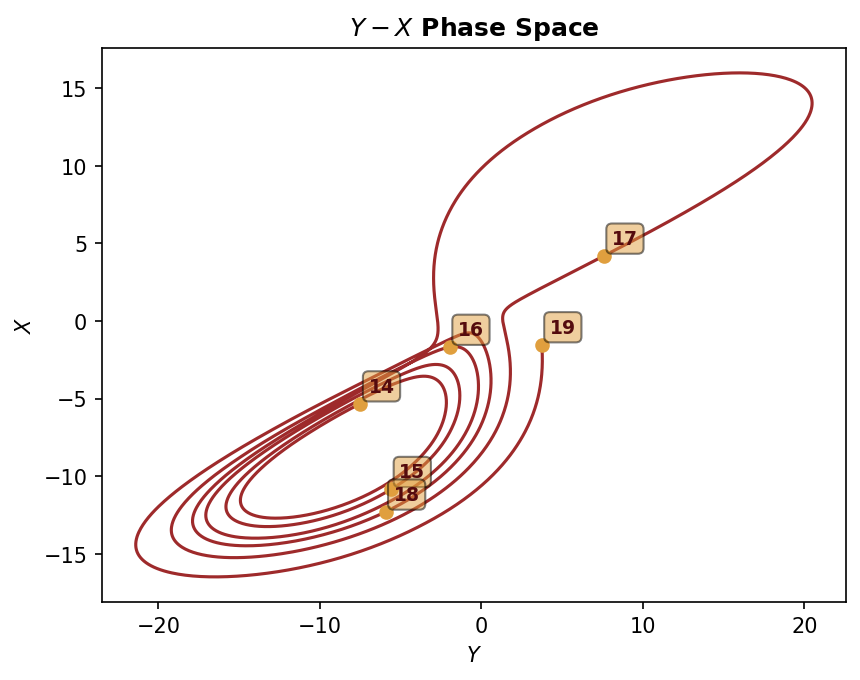

In [71]:
plt.figure(dpi=150)
plt.xlabel('$Y$')
plt.ylabel('$X$')
plt.title('$Y-X$ Phase Space', fontweight = 'bold')
plt.scatter(Y1419[::1000], X1419[::1000], c = cs[-3], zorder = 10)
for i in range(5):
    plt.text(Y1419[i * 1000] + 0.5, X1419[i * 1000]+ 0.5, str(14 + i), fontsize=9, color= cs[-1], zorder = 12, fontweight='bold', bbox = dict(facecolor=cs[-3], alpha=0.5, boxstyle='round,pad=0.3'), ha='left', va='bottom')

plt.scatter(Y1419[-1], X1419[-1], c = cs[-3], zorder = 11)
plt.text(Y1419[-1] + 0.5, X1419[-1]+ 0.5, '19', fontsize=9, color= cs[-1], zorder = 12, fontweight='bold', bbox = dict(facecolor=cs[-3], alpha=0.5, boxstyle='round,pad=0.3'), ha='left', va='bottom')
plt.plot(Y1419, X1419, c = cs[-2])

plt.savefig('figures/q3p4a.png')
plt.show()

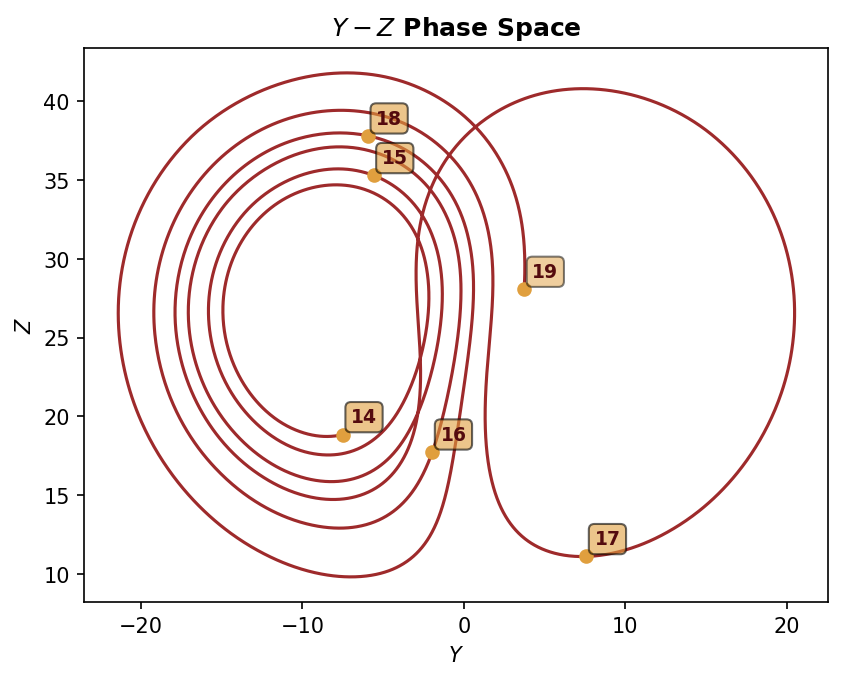

In [72]:
plt.figure(dpi=150)
plt.xlabel('$Y$')
plt.ylabel('$Z$')
plt.title('$Y-Z$ Phase Space', fontweight = 'bold')
plt.scatter(Y1419[::1000], Z1419[::1000], c = cs[-3], zorder = 10)
plt.scatter(Y1419[-1], Z1419[-1], c = cs[-3], zorder = 11)
plt.plot(Y1419, Z1419, c = cs[-2])
for i in range(5):
    plt.text(Y1419[i * 1000] + 0.5, Z1419[i * 1000]+ 0.5, str(14 + i), fontsize=9, color= cs[-1], zorder = 12, fontweight='bold', bbox = dict(facecolor=cs[-3], alpha=0.6, boxstyle='round,pad=0.3'), ha='left', va='bottom')
plt.text(Y1419[-1] + 0.5, Z1419[-1]+ 0.5, '19', fontsize=9, color= cs[-1], zorder = 12, fontweight='bold', bbox = dict(facecolor=cs[-3], alpha=0.5, boxstyle='round,pad=0.3'), ha='left', va='bottom')

plt.savefig('figures/q3p4b.png')

## Part 5

In [73]:
#alter the initial conditions slightly
y02 = (0., 1. + 1e-8, 0.) #initial conditions
solution = solve_ivp(lorenz_system, (0, t_range), y02, t_eval = t_eval) #solve the system
X2, Y2, Z2 = solution.y #unpack the solution
t2 = solution.t #unpack the time points

In [74]:
#find the distance bw original ic points and new points
dist = np.sqrt((X-X2)**2 + (Y-Y2)**2 + (Z-Z2)**2)

In [75]:
np.all(t == t2)

np.True_

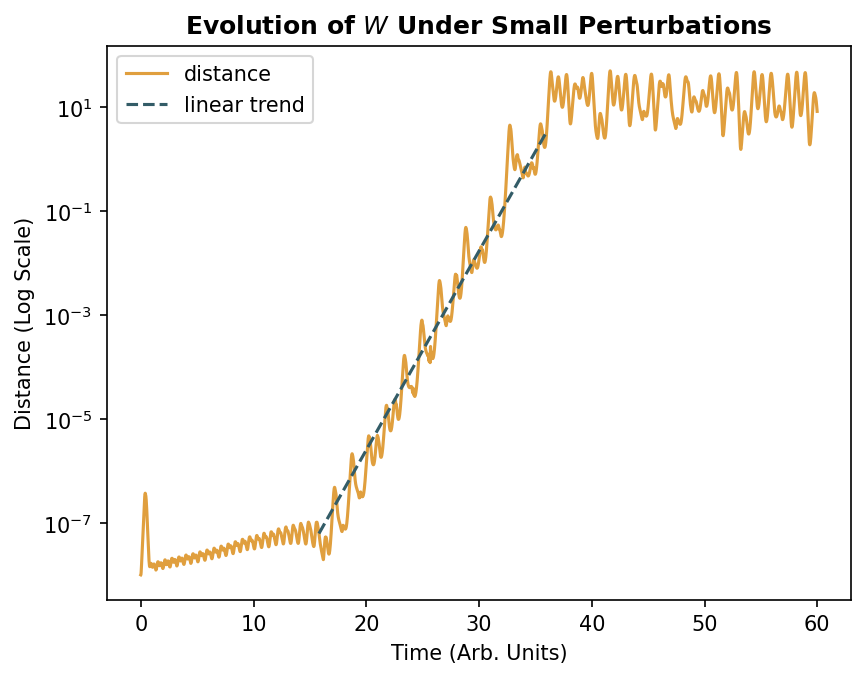

In [76]:
#plot as a function of time
plt.figure(dpi = 150)
plt.plot(t, dist, c = cs[-3], label = 'distance')
plt.plot(t[[1580, 3600]], dist[[1580, 3600]], linestyle = '--', c = cs[0], label = 'linear trend')
plt.yscale('log')
plt.legend()

plt.title('Evolution of $W$ Under Small Perturbations', fontweight = 'bold')
plt.ylabel('Distance (Log Scale)')
plt.xlabel('Time (Arb. Units)')

plt.savefig('figures/q3p5.png')